# Objective: Forest vs Building Classification Using ANN

Steps:
1. Importing (or installing) Tenosrflow, Keras and other packages on your system
2. Loading your data from disk
3. Creating your training and testing splits
4. Data Preprocessing 
5. Defining your tensorflow ANN model architecture
6. Compiling your tensorflow ANN model
7. Training your model on your training data
8. Evaluating your model on your test data
9. Generate Plots for accuracy and validation loss
10. Saving The train model
11. Making predictions using your trained tensorflow model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


### Step 1: Importing all the packages

In [2]:
# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

### Step 2: Loading your data from disk for training

In [3]:
list(paths.list_images('dataset'))[-10:]

['dataset\\Forest\\929.jpg',
 'dataset\\Forest\\938.jpg',
 'dataset\\Forest\\943.jpg',
 'dataset\\Forest\\954.jpg',
 'dataset\\Forest\\958.jpg',
 'dataset\\Forest\\966.jpg',
 'dataset\\Forest\\978.jpg',
 'dataset\\Forest\\98.jpg',
 'dataset\\Forest\\980.jpg',
 'dataset\\Forest\\997.jpg']

In [4]:
img = cv2.imread("D:\\nettech\\ImageClassificationWithANN\\dataset\\Buildings\\315.jpg")

In [5]:
img.shape

(150, 150, 3)

In [6]:
img.flatten()/255

array([0.15294118, 0.15686275, 0.14901961, ..., 0.35294118, 0.2       ,
       0.09019608])

In [7]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []

labels = []

classes = ["Forest", "Buildings"]

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('dataset')))   # data folder with 2 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

        # extract the class label from the image path and update the labels list
        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Buildings" else 0
        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/883 [00:00<?, ?it/s]

Time taken: 1.1 seconds
done


In [8]:
print(data[0],labels[0])

[0.31764706 0.29803922 0.28627451 ... 0.74117647 0.58823529 0.4627451 ] 0


In [9]:
print("Total Images: ", len(data[1]))

Total Images:  3072


In [10]:
# convert data into dataframe 
import pandas as pd
df = pd.DataFrame(data)
df['label'] = labels

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,label
0,0.317647,0.298039,0.286275,0.360784,0.321569,0.321569,0.090196,0.086275,0.082353,0.105882,...,0.698039,0.556863,0.431373,0.803922,0.654902,0.521569,0.741176,0.588235,0.462745,0
1,0.466667,0.380392,0.031373,0.517647,0.454902,0.019608,0.105882,0.039216,0.003922,0.117647,...,0.525490,0.482353,0.011765,0.494118,0.482353,0.007843,0.513725,0.513725,0.094118,1
2,0.533333,0.956863,0.874510,0.800000,0.952941,0.854902,0.164706,0.568627,0.380392,0.345098,...,0.192157,0.333333,0.380392,0.262745,0.372549,0.458824,0.058824,0.180392,0.231373,0
3,0.203922,0.172549,0.094118,0.137255,0.137255,0.070588,0.282353,0.215686,0.054902,0.580392,...,0.172549,0.356863,0.129412,0.164706,0.337255,0.145098,0.172549,0.364706,0.188235,0
4,0.062745,0.101961,0.109804,0.062745,0.109804,0.113725,0.031373,0.078431,0.094118,0.015686,...,0.101961,0.603922,0.325490,0.043137,0.396078,0.145098,0.047059,0.435294,0.227451,0


In [12]:
df.shape

(883, 3073)

In [13]:
# sample data for first image
print("sample image: {}".format(data[0]))
print("no of features/pixels values: {}".format(len(data[0]))) # 32x32x3=3072
print("label: {}".format(classes[labels[0]]))

sample image: [0.31764706 0.29803922 0.28627451 ... 0.74117647 0.58823529 0.4627451 ]
no of features/pixels values: 3072
label: Forest


### Step 3: Creating your training and testing splits

In [14]:
# partition the data into 80% training and 20% validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=SEED)

### Step 4: Data Preprocessing 

In [15]:
# convert the labels from integers/categories to vectors 

trainY = to_categorical(trainY, num_classes=2)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = to_categorical(testY, num_classes=2)     # transform = perform the one-hot encoding (unique class labels already found)

# [0,1] Buildings
# [1,0] Forest

In [16]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [17]:
sample_image = (trainX[52] * 255).astype("int")

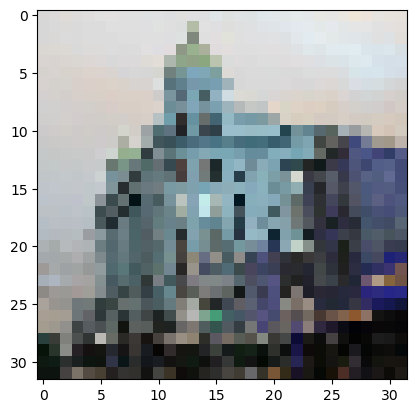

In [18]:
plt.imshow(sample_image.reshape(32,32,3))

In [19]:
trainY[52]   # [0,1] means buildings [1,0] means forest

array([0., 1.])

### Step 5:  Define the architecture for ANN MODEL

In [20]:
# define the 3072-1024-512-1 architecture using Keras

model = Sequential()   

# input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
# first hidden layer has 1024 nodes
model.add(Dense(units= 1024, input_shape=(3072,), kernel_initializer = 'uniform', activation="relu"))  
model.add(Dropout(0.4))

# second hidden layer has 512 nodes
model.add(Dense(units=512, kernel_initializer='uniform', activation="relu"))                         

 # output layer with number of possible class labels
model.add(Dense(units=2,kernel_initializer='uniform', activation="softmax"))           

## Compile Model

### Step 6:  Compiling your tensorflow ANN model

In [21]:
# initialize our initial learning rate and # of epochs to train for

EPOCHS = 50
 
# compile the model using SGD as our optimizer and categorical cross-entropy loss
# (you'll want to use binary_crossentropy for 2-class classification)
print("[INFO] compiling network network...")
opt = SGD(0.01)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling network network...


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,672,578 (14.01 MB)

 Trainable params: 3,672,578 (14.01 MB)

 Non-trainable params: 0 (0.00 B)

### Step 7: Training your model on your training data

In [23]:
# train the neural network on training data set
# batch_size (32) controls the size of each group of data to pass through the network. 

time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5415 - loss: 0.6763 - val_accuracy: 0.5367 - val_loss: 0.6442
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5505 - loss: 0.6439 - val_accuracy: 0.6441 - val_loss: 0.6325
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5907 - loss: 0.6236 - val_accuracy: 0.5424 - val_loss: 0.6066
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5643 - loss: 0.6189 - val_accuracy: 0.5367 - val_loss: 0.6034
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5732 - loss: 0.5949 - val_accuracy: 0.7458 - val_loss: 0.5680
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6726 - loss: 0.5832 - val_accuracy: 0.7401 - val_loss: 0.5438
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7040 - loss: 0.5562 - val_accuracy: 0.6610 - val_loss: 0.5342
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6901 - loss: 0.5458 - val_accuracy: 0.6780 - v

### Step 8: Evaluating your model on your test data 

In [24]:
# evaluate the network
print("[INFO] evaluating network...")
pred_prob = model.predict(testX, batch_size=32)

[INFO] evaluating network...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [25]:
pred_prob

array([[1.44374630e-04, 9.99855638e-01],
       [9.94315922e-01, 5.68405818e-03],
       [4.30467517e-05, 9.99956965e-01],
       [9.98803020e-01, 1.19697745e-03],
       [8.19517255e-01, 1.80482730e-01],
       [9.99979973e-01, 1.99698661e-05],
       [2.64060945e-05, 9.99973536e-01],
       [8.55982661e-01, 1.44017369e-01],
       [9.96821165e-01, 3.17878556e-03],
       [9.99999881e-01, 1.78170581e-07],
       [1.94492161e-01, 8.05507779e-01],
       [1.34917095e-01, 8.65082920e-01],
       [4.30018903e-04, 9.99569952e-01],
       [2.60670781e-01, 7.39329219e-01],
       [1.55955285e-01, 8.44044745e-01],
       [8.52171183e-01, 1.47828802e-01],
       [1.74819422e-03, 9.98251736e-01],
       [4.46238255e-06, 9.99995589e-01],
       [9.99900818e-01, 9.91570705e-05],
       [4.80543204e-05, 9.99951959e-01],
       [3.94060655e-04, 9.99605954e-01],
       [7.94483185e-01, 2.05516800e-01],
       [9.71355855e-01, 2.86440682e-02],
       [3.20210238e-05, 9.99967933e-01],
       [2.464566

### Convert testY and y_pred into 1's and 0 for classification report


In [26]:
test_y = [ np.argmax(i)  for i in testY]
pred_y = [ np.argmax(i)  for i in pred_prob]

In [27]:
test_y[:5]

[1, 0, 1, 0, 1]

In [28]:
pred_y[:5]

[1, 0, 1, 0, 0]

In [29]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

Confusion Matrix, Without Normalisation


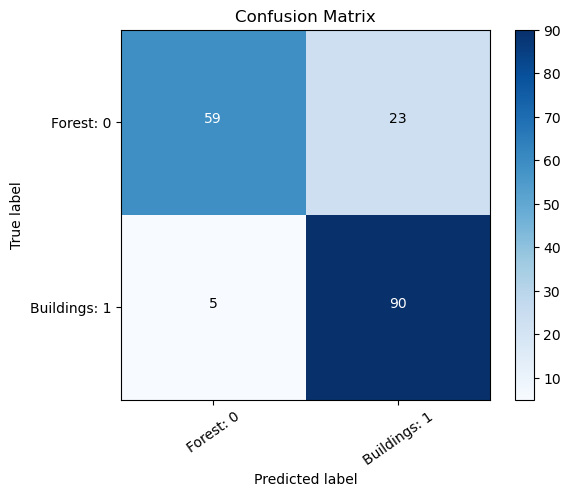

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.80      0.95      0.87        95

    accuracy                           0.84       177
   macro avg       0.86      0.83      0.84       177
weighted avg       0.85      0.84      0.84       177

-----------------------------------------------------
Accuracy of the model:  0.8418079096045198


In [30]:
plot_confusion_metrix(test_y, pred_y,classes=["Forest: 0","Buildings: 1"])

### Step 9: Generate Plots for acc and val 

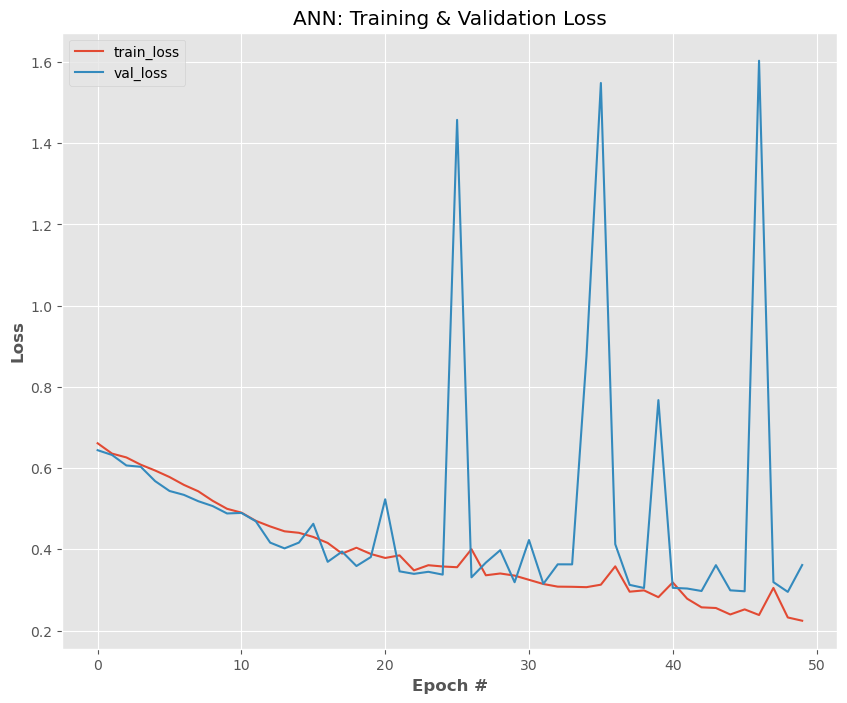

In [31]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

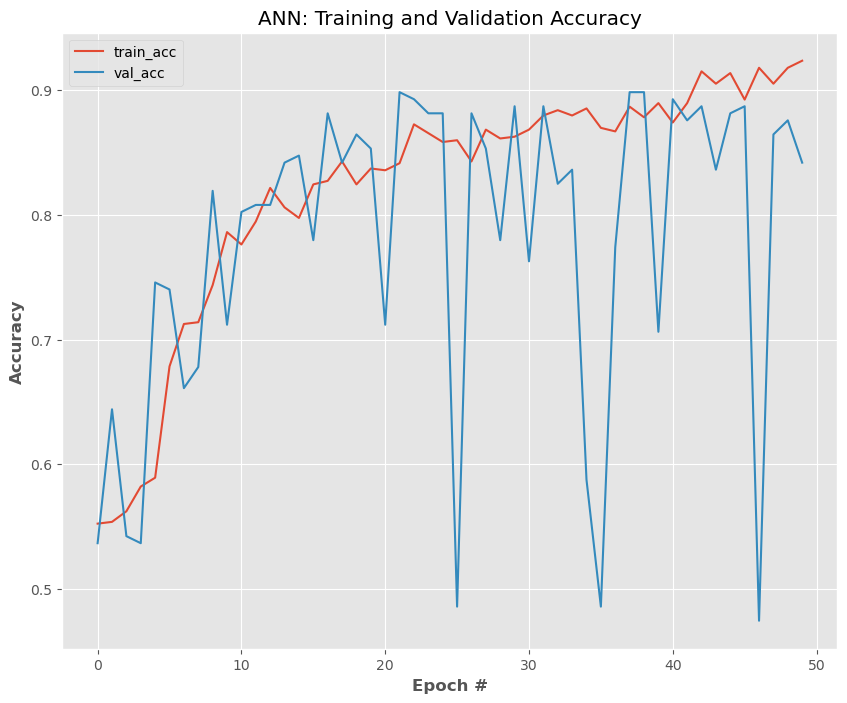

In [32]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

### Step 10: Saving the train model 

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,672,580 (14.01 MB)

 Trainable params: 3,672,578 (14.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [34]:
# save the model and label binarizer to disk
model.save('final_model.h5')


In [35]:
#function to predict on custom images

def predict(image_path):

    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32)).flatten()
    image = image.astype("float") / 255.0
    pred = model.predict(np.expand_dims(image, axis=0))[0]
    pred = np.argmax(pred)
    if pred ==1:
        return "The input image is a Building"
    else:
        return 'The input image is a Forest'

In [39]:
print(predict('D:\\Set\\Important\\Downloads\\forest_img.png'))
print(predict('D:\\Set\\Important\\Downloads\\city_img.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The input image is a Forest
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The input image is a Building
